In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

## Phân đoạn ảnh dựa vào kĩ thuật cắt ngưỡng toàn cục

In [2]:
def image_segmentation_using_global_thresholding(image, threshold):
    m, n = image.shape
    image_segmentation = np.zeros([m, n])
    for i in range(m):
        for j in range(n):
            if image[i, j] < threshold:
                image_segmentation[i, j] = 0
            else:
                image_segmentation[i, j] = 255
    return image_segmentation


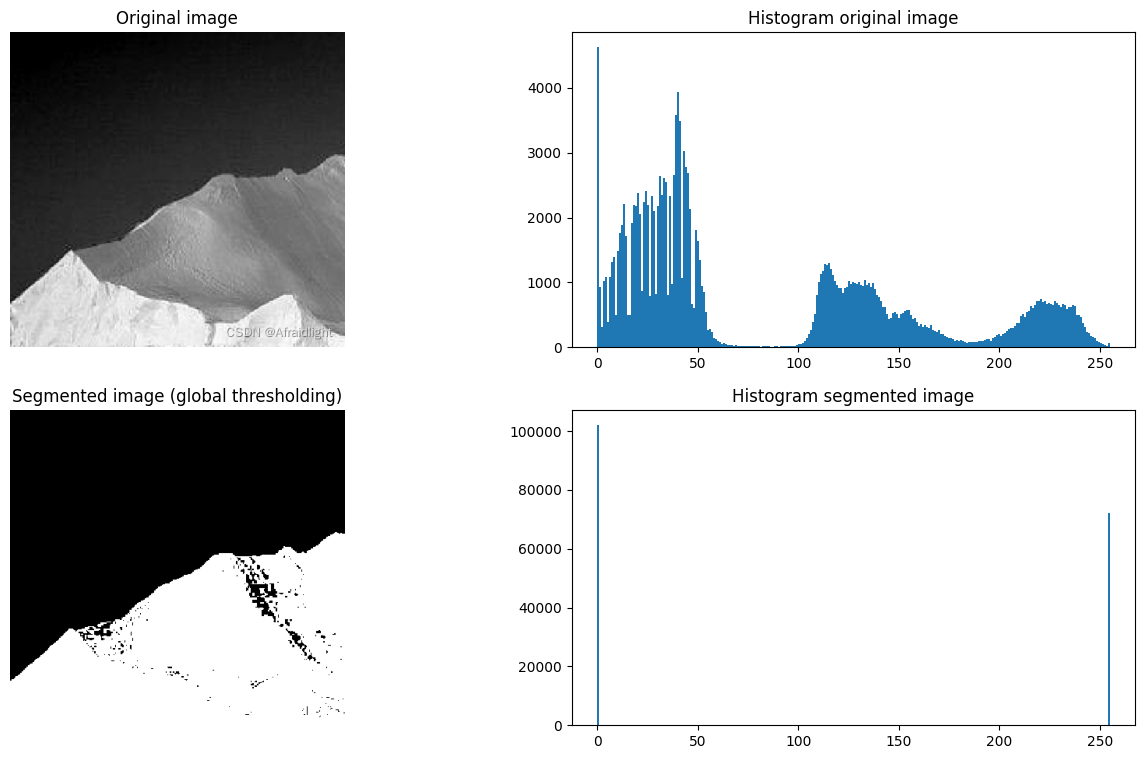

In [3]:
if __name__ == "__main__":
    original_image = cv2.imread('./faebcdf0351d4290bb89a488203c741a.png', 0)
    threshold = 110
    segmented_image = image_segmentation_using_global_thresholding(original_image, threshold)

    fig2 = plt.figure(figsize=(16,9))
    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
    ax1.imshow(original_image, cmap='gray')
    ax1.set_title('Original image')
    ax1.axis('off')

    ax2.hist(original_image.flatten(), bins=256)
    ax2.set_title('Histogram original image')

    ax3.imshow(segmented_image, cmap='gray')
    ax3.set_title('Segmented image (global thresholding)')
    ax3.axis('off')

    ax4.hist(segmented_image.flatten(), bins=256)
    ax4.set_title('Histogram segmented image')
    plt.show()

## Phân đoạn ảnh dựa vào kỹ thuật cắt ngưỡng Otsu

In [4]:
def Otsu(image):
    variance_t = 0  # Initialize the threshold variance variable
    best_threshold = 0  # Initialize the best threshold variable

    m, n = image.shape
    mean_gray = np.mean(image)  # Calculate the mean gray level of the image

    # Calculate histogram
    hist, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    for threshold in range(1, 256):
        # Calculate weights for class A and B
        weight_A = np.sum(hist[:threshold])
        weight_B = np.sum(hist[threshold:])
        
        if weight_A == 0 or weight_B == 0:
            continue
        
        # Calculate means for class A and B
        mean_A = np.sum(np.arange(0, threshold) * hist[:threshold]) / weight_A
        mean_B = np.sum(np.arange(threshold, 256) * hist[threshold:]) / weight_B
        
        # Calculate variance
        P1 = weight_A / (m * n)
        P2 = weight_B / (m * n)
        variance = P1 * ((mean_A - mean_gray) ** 2) + P2 * ((mean_B - mean_gray) ** 2)
        
        if variance > variance_t:
            variance_t = variance
            best_threshold = threshold

    print("Ngưỡng tìm được: ", best_threshold)
    return best_threshold

def image_segmentation_using_otsu(image, threshold):
    m, n = image.shape
    image_segment_using_otsu = np.zeros([m, n])
    image_segment_using_otsu[image >= threshold] = 255
    return image_segment_using_otsu


Ngưỡng tìm được:  97


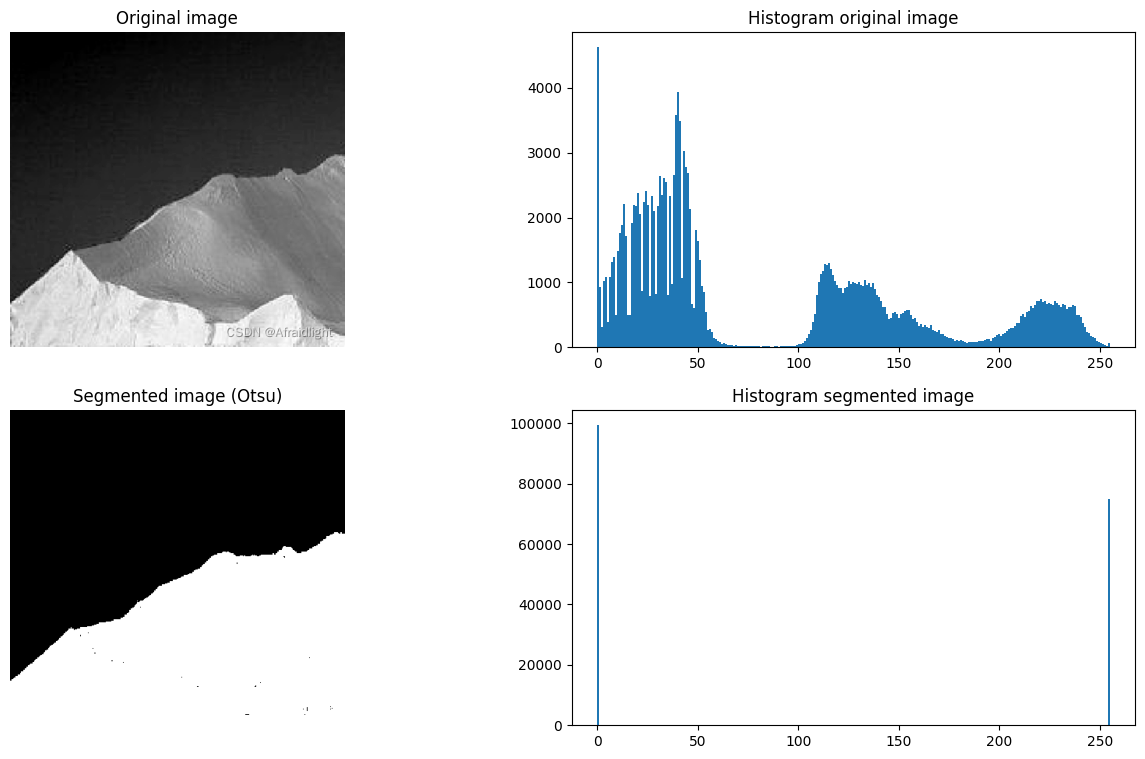

In [5]:
if __name__ == "__main__":
    image_original = cv2.imread('./faebcdf0351d4290bb89a488203c741a.png', 0)
    threshold = Otsu(image_original)
    segmented_image = image_segmentation_using_otsu(image_original, threshold)

    fig2 = plt.figure(figsize=(16,9))
    (ax1, ax2), (ax3, ax4) = fig2.subplots(2, 2)
    ax1.imshow(image_original, cmap='gray')
    ax1.set_title('Original image')
    ax1.axis('off')

    ax2.hist(image_original.flatten(), bins=256)
    ax2.set_title('Histogram original image')

    ax3.imshow(segmented_image, cmap='gray')
    ax3.set_title('Segmented image (Otsu)')
    ax3.axis('off')

    ax4.hist(segmented_image.flatten(), bins=256)
    ax4.set_title('Histogram segmented image')
    plt.show()

    

## Phân đoạn ảnh bằng cắt ngưỡng thích nghi dựa trên thuộc tính vùng ảnh cục bộ

In [6]:
def neighboring_segmentation(image, ksize):
    m, n = image.shape
    resulted_segmentation_image = np.zeros([m, n])
    h = (ksize - 1) // 2
    a = 20
    b = 1
    padded_image = np.pad(image, (h, h), mode='reflect') # ảnh mở rộng biên, giá trị biên thêm vào là h pixel
    mean_gray = np.mean(padded_image) 
    for i in range(m):
        for j in range(n):
            image_area_size_k = padded_image[i:i + ksize, j:j + ksize]
            standard_deviation = np.std(image_area_size_k) # Tính độ lệch chuẩn
            T = a * standard_deviation + b * mean_gray # Tính ngưỡng theo công thức
            if padded_image[i, j] > T: # Cắt ngưỡng theo công thức
                resulted_segmentation_image[i, j] = 255
            else:
                resulted_segmentation_image[i, j] = 0
    return resulted_segmentation_image

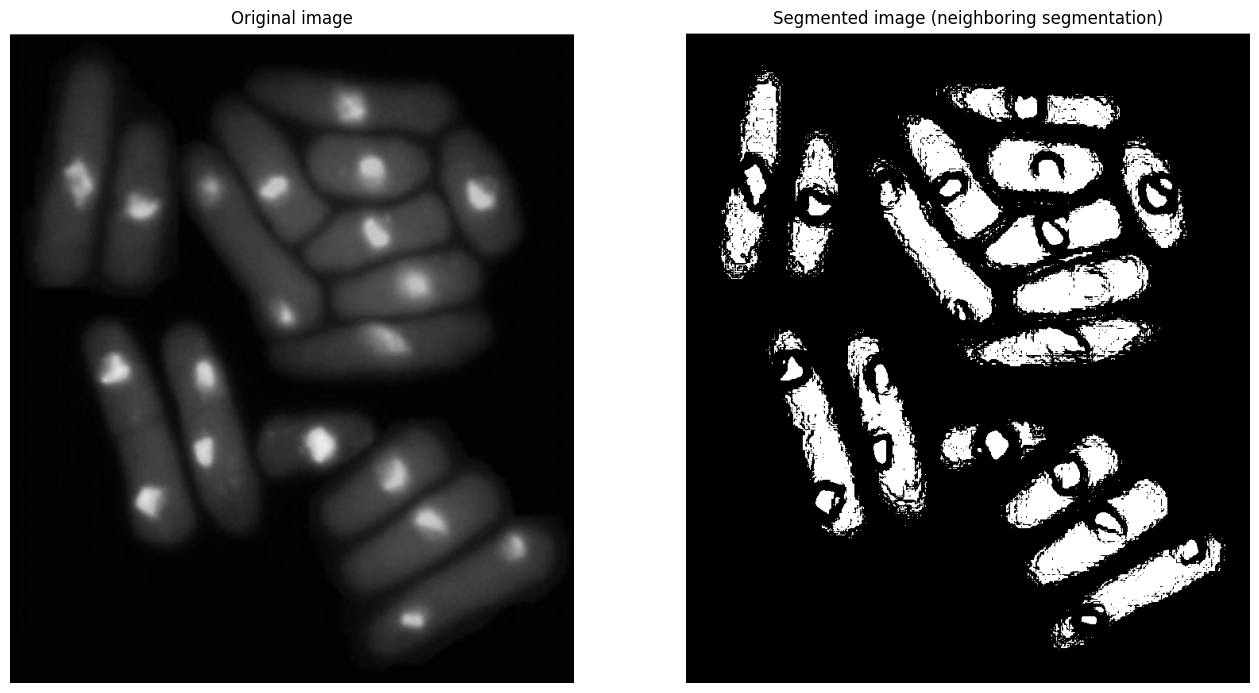

In [7]:
if __name__ == "__main__":
    original_image = cv2.imread('./phpJOSnep.png', 0)
    ksize = 3
    segmented_image = neighboring_segmentation(original_image, ksize)

    fig = plt.figure(figsize=(16,9))
    (ax1, ax2) = fig.subplots(1, 2)
    ax1.imshow(original_image, cmap='gray')
    ax1.set_title('Original image')
    ax1.axis('off')

    ax2.imshow(segmented_image, cmap='gray')
    ax2.set_title('Segmented image (neighboring segmentation)')
    ax2.axis('off')
    plt.show()

## References:
<p>https://blog.csdn.net/weixin_50722482/article/details/131265577</p>

<p>https://www.cnblogs.com/Fish0403/p/16796027.html</p>